In [138]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

data_list = []

for f_name in sorted(glob.glob("../test/*")):
    data = pd.read_csv(f_name, header=None, sep=" ")
    if len(data) == 2000000:
        grouped = data.groupby([0], as_index=False).mean()
        data_list.append((data, grouped))

In [139]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=True):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    data = np.sort(data, axis=0)
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
    
    if log:
        d = np.log(d)

    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]

In [145]:
img_size = 32
channels = 1
n_pixel = (img_size ** 2) * channels

# plt.figure(figsize=(10,10))

dims = []
classes = []

for i in range(10000):
# for i in range(10):
    if i % 1000 == 0:
        print(i)
    to_plot = []
    for j in range(len(data_list)):
        line = data_list[j][1].iloc[i]
        to_plot.append([line[1], -(line[2] + line[3])])
    to_plot = np.array(to_plot)
#     plt.plot(np.log(to_plot[:, 0]), to_plot[:,1], "o-", alpha=0.2)
    dims.append(n_pixel - calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=False, show=False))
    classes.append(line[4])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


167.00696894178802


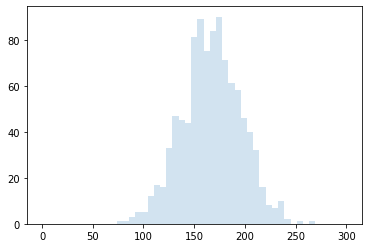

169.35346788875586


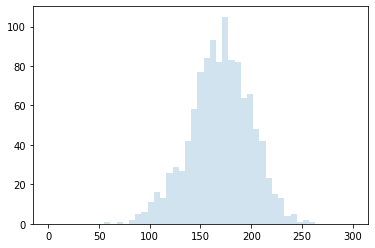

169.1644157233808


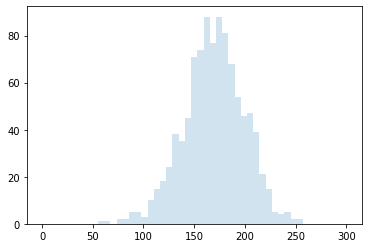

169.7699196713716


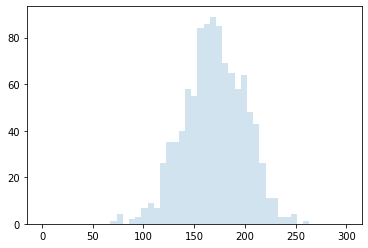

170.06115829102148


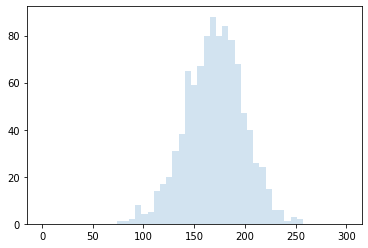

168.14398577159528


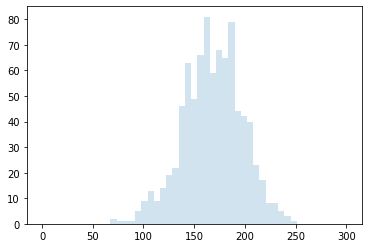

167.57847353243355


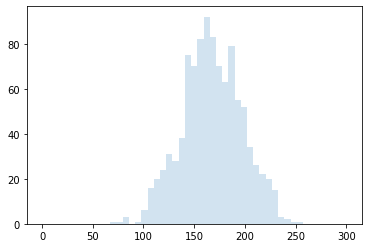

167.23298270897868


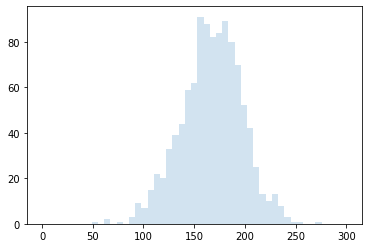

169.8496405518835


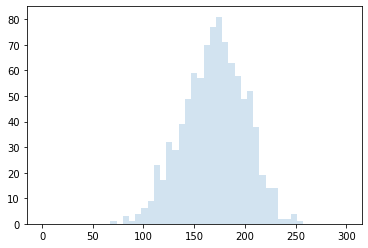

167.92347605266173


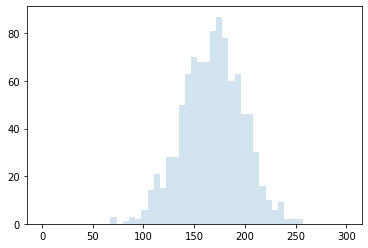

In [198]:
dims = np.array(dims)
classes = np.array(classes)
# plt.hist(dims, bins=100);
for i in range(10):
    print(np.mean(dims[classes==i]))
    plt.hist(dims[classes==i], alpha=0.2, label=str(i), bins = np.linspace(0, 300, 50))
    plt.show()
# plt.legend();

In [169]:
i = np.argmin(dims)

In [154]:
import sys
sys.path.append("/home/model/users/pt/phd/gmum/glow-pytorch/")

from samplers import memory_mnist

In [156]:
train_loader, val_loader, train_val_loader, train_labels, val_labels = memory_mnist(
    1, 32, 1, return_y=True
)

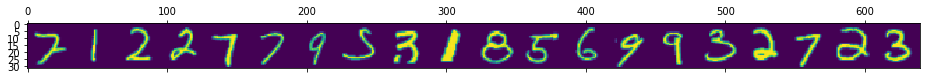

In [194]:
imgs = []
for i in dims.argsort()[:20]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

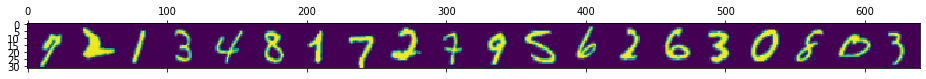

In [195]:
imgs = []
for i in dims.argsort()[5000:5020]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

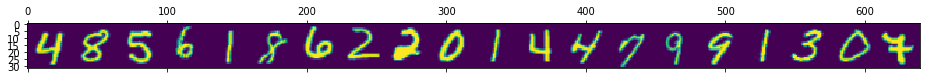

In [196]:
imgs = []
for i in dims.argsort()[-20:]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

In [181]:
import torchvision
data = torchvision.datasets.MNIST(
    "~/datasets/mnist/", train=True, download=True
)

In [182]:
data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,